## Math 157: Intro to Numerical Solutions to ODE
## Yiwei Sang, Winter 2018

## Ordinary Differential Equation (ODE)

* An ordinary differential equation (ODE) is a differential equation that contains one or more functions of one independent variable and its derivatives.

* The term ordinary is used in contrast with the term partial differential equation which may be with respect to more than one independent variable. 

* The solutions to an ODE are functions that satisfy the equation.

* The order of an ODE is the number of the highest derivatives in the ODE

* Linear ODE: A linear ODE having independent variable t and the dependent variable y is an ODE of the form $a_0(t)y(n) + ... + a_{n-1}y' + a_n(t)y = f(t)$

* Examples of ODE:

* $(y'(x))^2 − x^2 = sin(y)$

* $y''(x) + 7y'(x)0 + 12y = e^x$

## Solving ODE using SageMath

Example - Initial Value Problem (IVP)

* $x'(t) + x = 1$

* $x(0) = 2$

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DeprecationWarning: Calling function('f',x) is deprecated. Use function('f')(x) instead.
See http://trac.sagemath.org/17447 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


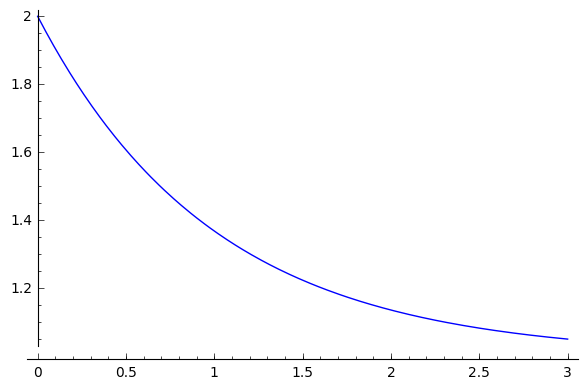

(e^t + 1)*e^(-t)

In [1]:
t = var('t')
x = function('x', t)
de = lambda y: diff(y, t) + y -1
soln = desolve(de(x), [x,t], [0,2])
P = plot(soln, 0, 3)
show(P)
soln

Sage's desolve may not be able to solve some difficult ODE.

In [10]:
desolve(sqrt(y)*diff(y,x)+e^(y)+cos(x)-sin(x+y)==0,y) 
# This will cause an error

NotImplementedError: is_square() not implemented for elements of Multivariate Polynomial Ring in x, y over Rational Field

## Application: Falling Body

Consider a mass m falling due to gravity. We orient coordinates to that downward is positive. Let $x(t)$ denote the distance the mass has fallen at time t and $v(t)$ is the velocity at time t. Let assume only two forces act: the force due to gravity $F_{grav} = mg$, and the force due to air resistance $F_{res}$.  So $F_{total} = F_{grav} + F_{res}$. We assume that air resistance is proportional to velocity: $F_{res} = -kv = -x'(t)$, where $k >= 0$ is a constant. By Newton's second law: $F_{total} = ma = mx''(t)$. Putting these all together gives $mx''(t) = mg - kx'(t)$, or $v'(t) + \frac{k}{m}v(t) = g$

Example: Suppose we have a mass 100kgs(with chute). The chute is released 30 secods after the jump from a height of 2000m. The force due to air resistence is giving by $F_{res} - -kv$, where $k=15$ when chute closed and $k=100$ when chute open. Suppose g = 9.8. Find

(a) The velocity functions during the time when the chute is closed (i.e $ <= t <=30$ seconds)

In [2]:
RR = RealField(sci_not = 0, prec = 50, rnd = 'RNDU')
t = var('t')
v = function('v', t)
m = 100; g = 98/10; k = 15
de = lambda v: m*diff(v,t) + k*v - m*g
desolve(de(v), [v, t], [0, 0])

196/3*(e^(3/20*t) - 1)*e^(-3/20*t)

In [3]:
soln1 = lambda t: 196/3 - 196*exp(-3*t/20)/3

The velocity at t = 30 is

In [4]:
RR(soln1(30))

64.607545559502

(b) The velocity functions during the time when the chute is open (i.e., $30 <= t $ seconds)

In [5]:
t = var('t')
v = function('v', t)
m = 100; g = 98/10; k = 100
de = lambda v: m*diff(v,t) + k*v - m*g
desolve(de(v), [v, t], [0, RR(soln1(30))])

1/17305940*(169598212*e^t + 948496095)*e^(-t)

In [6]:
soln2 = lambda t: 49/5+(631931/11530)*exp(-(t-30))\
+ soln1(30) - (631931/11530) - 49/5

In [7]:
print(RR(soln2(30)))
print(RR(soln1(30)))

64.607545559502
64.607545559502


Let's plot the results for both two periods

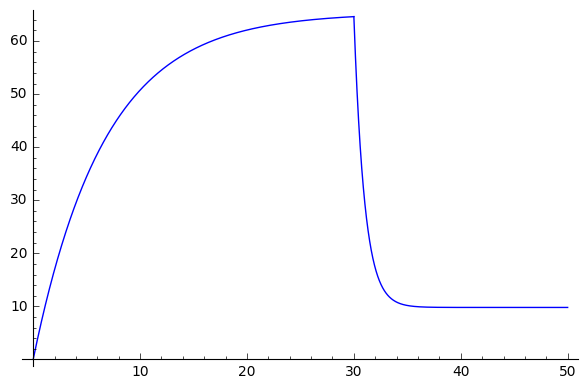

In [8]:
P1 = plot(soln1(t), 0, 30, plot_points = 1000)
P2 = plot(soln2(t), 30, 50, plot_points = 1000)
show(P1+P2)

## Numerical solutions - Euler's method

Euler's Method is intended for approximating solutions to differential equations that cannot be solved with a nice formula.

 Say we have a generic initial value problem $\frac{dy}{dx} = f(x, y)$ with $y(x_0) = y_0$. We are not able to find a nice formula for the solution $ y = g(x)$. We know if $f(x, y)$ is a continuous function, there exist a solution. Our goal is to say as much as we can about this solution, even though we may not be able to write down a formula for it.

Let's think about tangent line of the solution curve, since the tangent line is a good approximation to a curve near the point $(x_0, y_0)$. The equation of the tangent line to the solution at the point $(x_0, y_0)$ is $y=y_0 +f(x_0, y_0)(x-x_0)$. Let's move a short distance along the tangent line by increasing x by some small amount h, thwn we arrive at a new point, which we will call $(x_1, y_1)$. We can say the point $(x_1, y_1)$ is a almost on the solution curve $y = g(x)$. We can now find the tangent line to the solution at this new point $y = y_1 + f(x_1, y_1)(x-x_1)$, and then we increase x by the small amount h again, and come up with a new point $(x_2, y_2)$. Continuing with this method, we use the value of y found at each step to calculate the next value of y. This process can be stated by Euler's Formula: $y_{n+1} = y_n + f(x_n, y_n)(x_{n+1} - x_n)$

In [9]:
from sage.calculus.desolvers import eulers_method

These codes use euler's method to find the numerical solution of the ODE $y'(x) = x^2-y+3$, with initial condition $y(0) = 1$, with step size 0.1 for x from 0 to 1

In [10]:
x,y = PolynomialRing(QQ,2,"xy").gens()
eulers_method(x^2 - y + 3, 0, 1, 1/10, 1)

         x                    y                  h*f(x,y)
         0                    1                  1/5
      1/10                  6/5             181/1000
       1/5            1381/1000           1659/10000
      3/10          15469/10000         15431/100000
       2/5        170121/100000       145879/1000000
       1/2      1847089/1000000     1402911/10000000
       3/5    19873801/10000000   13726199/100000000
      7/10  212464209/100000000 136535791/1000000000
       4/5 2261177881/1000000000 1378822119/10000000000
      9/10 23990600929/10000000000 14109399071/100000000000
         1 254015408361/100000000000 145984591639/1000000000000


Plot of euler's method for the ODE $y'(x) = x^2 - y^3$, with intial condition $y(0) = 1$, with step size 1/3, 0.1, for x from 0 to 1

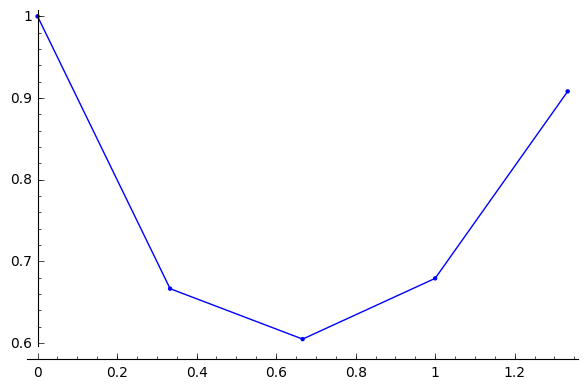

In [11]:
x,y = PolynomialRing(QQ,2,"xy").gens()
pts = eulers_method(x^2-y^3,0,1,1/3,1,algorithm="none")
P1 = list_plot(pts)
P2 = line(pts)
(P1+P2).show()

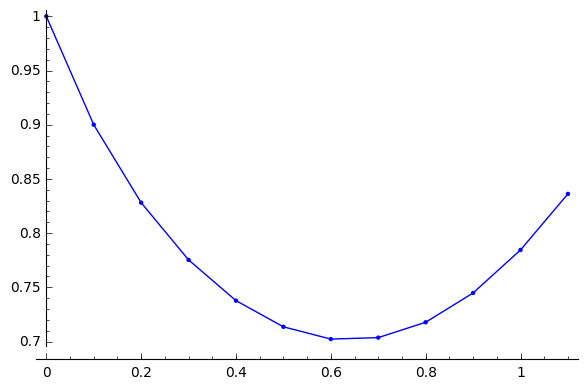

In [12]:
x,y = PolynomialRing(QQ,2,"xy").gens()
pts = eulers_method(x^2-y^3,0,1,1/10,1,algorithm="none")
P1 = list_plot(pts)
P2 = line(pts)
(P1+P2).show()

Remark: With smaller stepsize, the graph tends to be more smooth. The curve approximated will be more like the actual solution curve.

## Homogeneous Systems of Linear ODE

Consider the system of differential equations

* $\frac{dx}{dt} = -y + 3x$
* $\frac{dy}{dt} = x - 5$

The general solution of this system

In [16]:
t = var('t')
x = function('x')(t)
y = function('y')(t)
de1 = diff(x, t) + y - 3*x == 0
de2 = diff(y, t) - x + 5 == 0
desolve_system([de1, de2], [x, y])

[x(t) == 1/5*(sqrt(5)*(3*x(0) + 11)*sinh(1/2*sqrt(5)*t) + 5*(x(0) - 5)*cosh(1/2*sqrt(5)*t))*e^(3/2*t) + 5,
 y(t) == 1/5*(sqrt(5)*(2*x(0) + 29)*sinh(1/2*sqrt(5)*t) - 65*cosh(1/2*sqrt(5)*t))*e^(3/2*t) + 15]

Now give some initial condition

In [18]:
sol = desolve_system([de1, de2], [x,y], ics=[0,1,2])

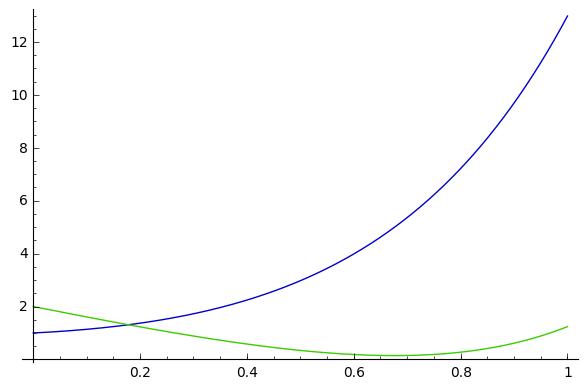

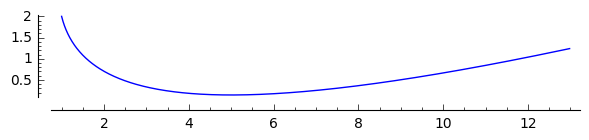

In [19]:
solnx = sol[0].rhs()
solny = sol[1].rhs()
P1 = plot([solnx,solny], (0,1))
P2 = parametric_plot((solnx,solny), (0,1))
show(P1)
show(P2)

## scipy.integrate.ode

scipy.integrate.ode is a generic interface class to numeric integrators

In [20]:
import numpy as np
from scipy.integrate import ode
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Example:
* $\frac{dy}{dx} + y^2 = x^3, y(0)=1$

array([[  1.        ],
       [  0.95192471],
       [  0.90828199],
       [  0.86854603],
       [  0.832322  ],
       [  0.79932449],
       [  0.76936134],
       [  0.74232071],
       [  0.71816112],
       [  0.6969033 ],
       [  0.67862348],
       [  0.66344764],
       [  0.65154635],
       [  0.6431298 ],
       [  0.63844289],
       [  0.63775994],
       [  0.64137898],
       [  0.64961519],
       [  0.66279354],
       [  0.68124042],
       [  0.70527416],
       [  0.73519468],
       [  0.77127224],
       [  0.81373586],
       [  0.86276177],
       [  0.91846236],
       [  0.98087664],
       [  1.0499629 ],
       [  1.12559424],
       [  1.20755782],
       [  1.29555815],
       [  1.38922466],
       [  1.48812326],
       [  1.59177132],
       [  1.69965506],
       [  1.8112482 ],
       [  1.92603044],
       [  2.04350448],
       [  2.16321056],
       [  2.28473753],
       [  2.40773026],
       [  2.53189308],
       [  2.6569898 ],
       [  2

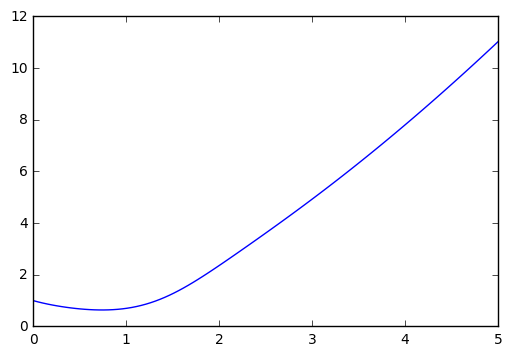

In [24]:
def f(y,x):
    return x^3 - y^2
t = np.linspace(0,5,100)
y0 = 1.0
sol = odeint(f, y0, t)
plt.plot(t, sol[:, 0], 'b')
sol

## Exercise 1

Consider a tank with 200 liters of salt-water solution, 30 grams of which is salt. Pouring into the tank is a brine solution at a rate of 4 liters/minute and with a concentration of 1 grams per liter. The “well-mixed” solution pours out at a rate of 5 liters/minute. Find the amount at time t, and plot the amount for t in [0, 200]

You can learn more about the mixing problem in https://docs.google.com/document/d/1aLDQwp9zQ0KL90y7C8S5HbuYKDITEq2X_qUMK7w2Pkk/edit

## Solution:

/ext/sage/sage-8.1/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


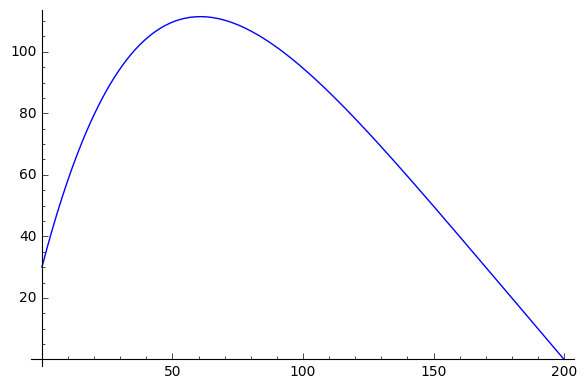

17/32000000000*t^5 - 17/32000000*t^4 + 17/80000*t^3 - 17/400*t^2 + 13/4*t + 30

In [25]:
t = var('t')
A = function('A', t)
de = lambda A: diff(A, t) + (5/(200-t))*A -4
soln = desolve(de(A), [A, t], [0,30])
p = plot(soln(t), 0, 200)
show(p)
soln

## Exercise 2

Consider:
* $y'(x) = (y-1)(y+1)$
* $y(0) = 1/2$

Sage cannot solve this (implicit) solution for x(t). Show the implicit plot.

## Solution:

In [26]:
t = var('t')
x = function('x', t)
de = lambda y: diff(y,t) == y^2 - 1
soln = desolve(de(x),[x,t])
soln

-1/2*log(x(t) + 1) + 1/2*log(x(t) - 1) == _C + t

In [27]:
c,xt = var("c,xt")
solnxt = (1/2)*log(abs(xt - 1)) - (1/2)*log(abs(xt + 1))== c + t
solve(solnxt.subs(t=0, xt=1/2),c)
c0 = solve(solnxt.subs(t=0, xt=1/2),c)[0].rhs()
c0

-1/2*log(2) - 1/2*log(3/2)

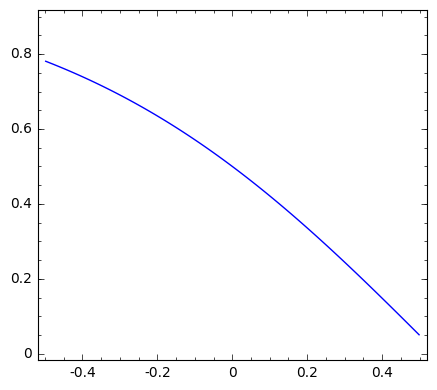

In [8]:
soln0 = solnxt.subs(c=c0); soln0
implicit_plot(soln0,(t,-1/2,1/2),(xt,0,0.9))

## Source

* https://www.usna.edu/Users/math/wdj/_files/documents/teach/sm212/DiffyQ/des-book-2009-11-24.pdf
* http://doc.sagemath.org/html/en/reference/calculus/sage/calculus/desolvers.html
* https://en.wikipedia.org/wiki/Ordinary_differential_equation